<a href="https://colab.research.google.com/github/thiagoteles10/EDA-Bolsa-familia/blob/main/EDA_Bolsa_fam%C3%ADlia_por_regi%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Este conjunto de dados se refere ao programa Bolsa Família, um programa de transferência de renda implementado no Brasil. Ele contém informações relacionadas a diferentes regiões geográficas e a distribuição do auxílio por região de acordo com vários fatores como por exemplo: o número de famílias de baixa renda em uma determinada região.

In [1]:
# IMPORTANDO BIBLIOTECAS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CARREGANDO O DATASET
df = pd.read_csv('bolsa_familia.csv')

In [3]:
# VERIFICANDO QUAIS VARIÁVEIS O DATASET POSSUI
df.head()

,year,month,region,families,funding,low_income_families,pct_served
0,2011,1,Mid-West,724830,"$63,050,270",1246826,58.13
1,2011,1,North,1361905,"$141,840,021",2095985,64.98
2,2011,1,Northeast,6515825,"$634,183,529",8380881,77.75
3,2011,1,South,1058840,"$91,296,718",1884472,56.19
4,2011,1,Southeast,3189945,"$279,860,083",6486791,49.18


In [4]:
# VERIFICANDO AS INFORMAÇÕES DO DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 385 non-null    int64  
 1   month                385 non-null    int64  
 2   region               385 non-null    object 
 3   families             385 non-null    int64  
 4   funding              385 non-null    object 
 5   low_income_families  385 non-null    int64  
 6   pct_served           385 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 21.2+ KB


In [5]:
# VERIFICANDO INFORMAÇÕES ESTATÍSTICAS
df.describe()

,year,month,families,low_income_families,pct_served
count,385.000000,385.000000,3.850000e+02,3.850000e+02,385.000000
mean,2013.727273,6.272727,2.736573e+06,4.018991e+06,64.638390
std,1.865506,3.470997,2.301277e+06,2.869218e+06,12.896235
min,2011.000000,1.000000,6.710480e+05,1.246826e+06,43.960000
25%,2012.000000,3.000000,9.419040e+05,1.884472e+06,53.930000
50%,2014.000000,6.000000,1.649223e+06,2.095985e+06,58.560000
75%,2015.000000,9.000000,3.525949e+06,6.486791e+06,80.160000
max,2017.000000,12.000000,7.197517e+06,8.380881e+06,85.880000


In [6]:
# SUBSTITUINDO O $ E , POR ESPAÇO VAZIO PARA FAZERA A ALTERAÇÃO DE OBJECT PARA INT
df['funding'] = df['funding'].apply(lambda x: x.replace('$', ''))
df['funding'] = df['funding'].apply(lambda x: x.replace(',', ''))

In [7]:
# CONVERTEMDO PARA INT
df['funding'] = df['funding'].astype(int)

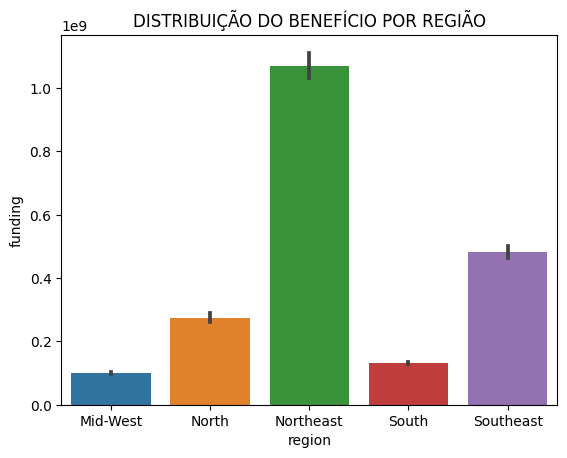

In [8]:
# PLOTANDO UM GRÁFICO DA DISTRIBUIÇÃO DO VALOR DO BENEFÍCIO POR REGIÃO
_= sns.barplot(x='region',y='funding',data=df)
_=plt.title('DISTRIBUIÇÃO DO BENEFÍCIO POR REGIÃO')

Vemos acima que o valor investido na região nordeste é mais que o dobro da região com o 2º maior ivestimento que é a região sudeste.

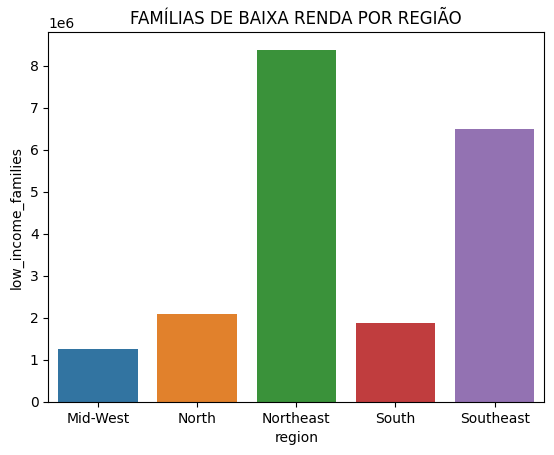

In [9]:
# PLOTANDO UM GRÁFICO DAS FAMÍLIAS DE BAIXA RENDA POR REGIÃO
_= sns.barplot(x='region',y='low_income_families',data=df)
_=plt.title('FAMÍLIAS DE BAIXA RENDA POR REGIÃO')

Vemos que as famílias de baixa renda encontram-se em sua maioria na região nordeste seguidas pela região sudeste, norte sul e centro oeste. Vendo esse gráfico, podemos ter uma noção da distribção do benefício por região.

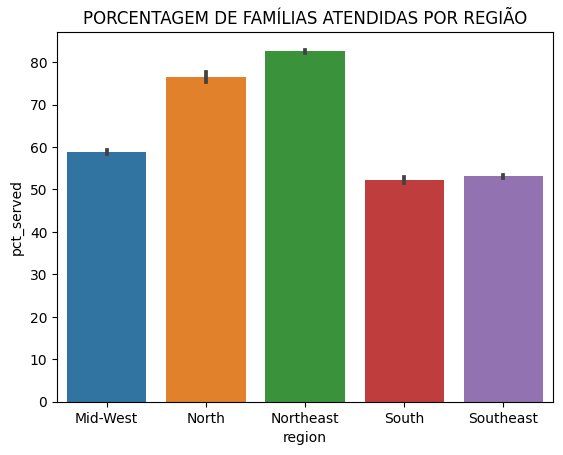

In [10]:
# PLOTANDO UM GRÁFICO DA PORCENTAGEM DE FAMÍLIAS ATENDIDAS POR REGIÃO
_= sns.barplot(x='region',y='pct_served',data=df)
_= plt.title('PORCENTAGEM DE FAMÍLIAS ATENDIDAS POR REGIÃO')

Vemos que a região Nordeste por ter o maior número de famílias de baixa renda, além de receber o maior número de investimento do benefício, tem mais de 80% das famílias de baixa renda beneficidas pelo bolsa família.

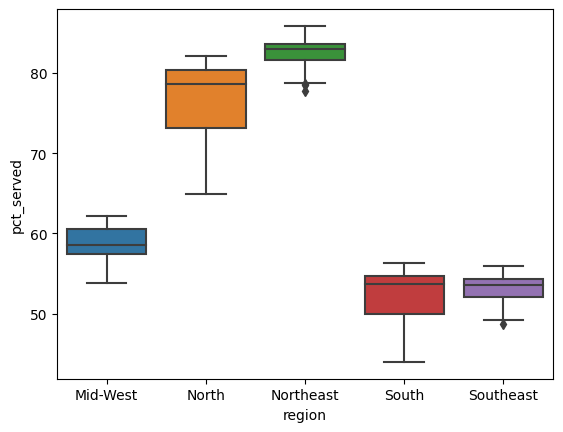

In [29]:
_=sns.boxplot(x='region', y='pct_served', data=df)

Vemos que apesar de a região sudeste ocupar o 2º lugar entre as famílias de baixa renda, o boxplot nos mostra que temos uma cobertura do benefício inferior a 60% nessa região, o que é  menor que a cobertura dada a região centro oeste que possui o menor número de famílias de baixa renda.

In [43]:
# VERIFICANDO A PORCENTAGEM EXATA DE FAMÍLIAS DE BAIXA RENDA QUE O BENEFÍCIO COBRE NA REGIÃO SUDESTE.
porc_sudeste = df[df['region']== 'Southeast']
porc_sudeste = porc_sudeste['pct_served'].max()
print(f'o benefício atende a {porc_sudeste}% da população de baixa renda da região sudeste')

o benefício atende a 55.95% da população de baixa renda da região sudeste


In [12]:
# CONVERTENDO AS COLUNAS PARA 'str'
df['year'] = df['year'].astype(str)
df['month'] = df['month'].astype(str)

In [13]:
# CRIANDO UMA NOVA COLUNA CHAMADA PERÍODO E JUNTANDO 'year' e 'month'
df['period'] = df[['year','month']].agg('-'.join, axis=1)

In [14]:
# TRANSFORMANDO PARA O FORMATO DATETIME
df['period'] = pd.to_datetime(df['period'])

In [15]:
# EXCLUINDO AS COLUNAS YEAR E MONTH
df = df.drop(columns=['year','month'])

In [16]:
north = df[df['region'] == 'North']
midwest = df[df['region'] == 'Mid-West']
northeast = df[df['region'] == 'Northeast']
south = df[df['region'] == 'South']
southeast = df[df['region'] == 'Southeast']

Text(0, 0.5, 'Valor do Fundo Investido')

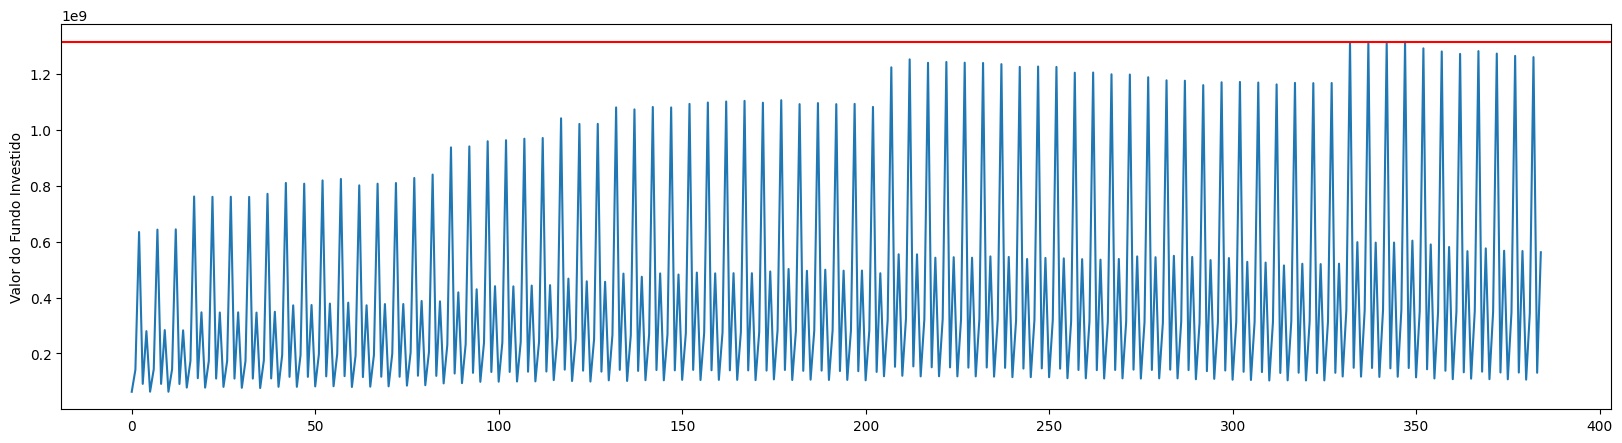

In [17]:
# VISUALIZANDO O PICO MÁXIMO DO FUNDO INVESTIDO
plt.figure(figsize=(20,5))
plt.plot(df.funding)
plt.axhline(df.funding.max(), color='red');
plt.ylabel('Valor do Fundo Investido')

In [18]:
# PICO MÁXIMO DE FAMÍLIAS ATENDIDAS PELO BENEFÍCIO
max_investido = df['funding'].max()
print(f'o máximo de fundo investido pelo programa foi R$ {max_investido:,.2f}')

o máximo de fundo investido pelo programa foi R$ 1,314,394,859.00


In [19]:
# REGIÃO COM O MAIOR INVESTIMENTO
df[df['funding']== 1314394859]

,region,families,funding,low_income_families,pct_served,period
347,Northeast,6983932,1314394859,8380881,83.33,2016-10-01


Vemos que a região nordeste recebeu o maior investimento, tendo 83.33% da população de baixa renda atendida pelo benefício.

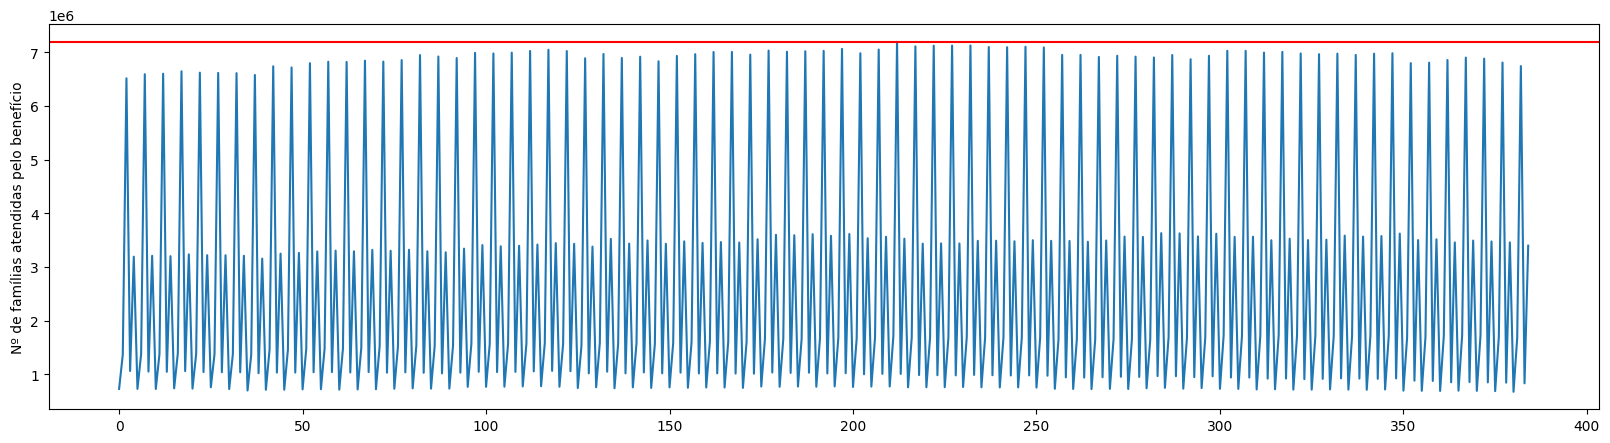

In [20]:
plt.figure(figsize=(20,5))
plt.plot(df.families)
plt.ylabel('Nº de famílias atendidas pelo benefício')
plt.axhline(df.families.max(), color='red');

In [21]:
# PICO MÁXIMO DE FAMÍLIAS ATENDIDAS PELO BENEFÍCIO
max_familias = df['families'].max()
print(f'o máximo de famílias atendidads pelo benefício foi de: {max_familias:,.2f}')

o máximo de famílias atendidads pelo benefício foi de: 7,197,517.00


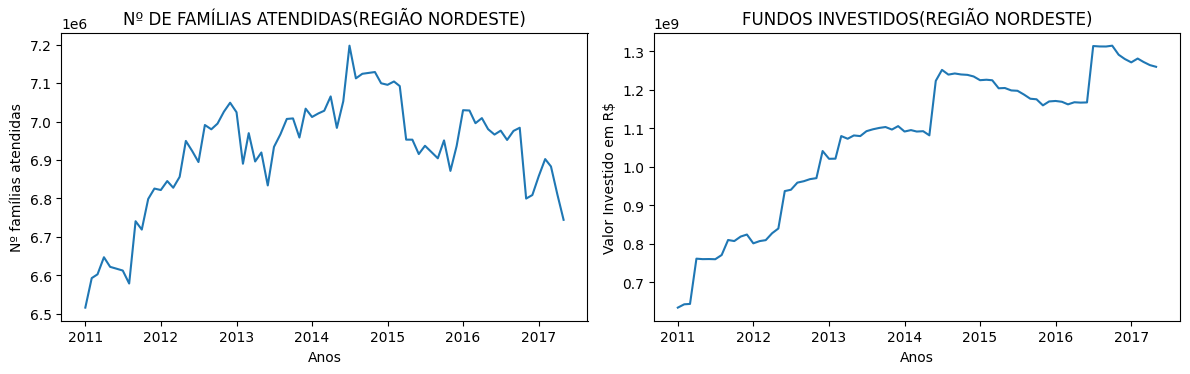

In [22]:
# Criando os valores para os eixos
x = northeast.period
y1 = northeast.families 
y2 = northeast.funding

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotar o primeiro gráfico no primeiro subplot (ax1)
ax1.plot(x, y1)
ax1.set_title('Nº DE FAMÍLIAS ATENDIDAS(REGIÃO NORDESTE)')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Nº famílias atendidas')

# Plotar o segundo gráfico no segundo subplot (ax2)
ax2.plot(x, y2)
ax2.set_title('FUNDOS INVESTIDOS(REGIÃO NORDESTE)')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor Investido em R$')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()

Vemos no gráfico acima que encontramos o pico máximo de famílias atendidas entre 2014 e 2015 para região Nordeste. O número de famílias atendidas vem caindo, enquanto os investimentos na região nordeste vem crescendo.

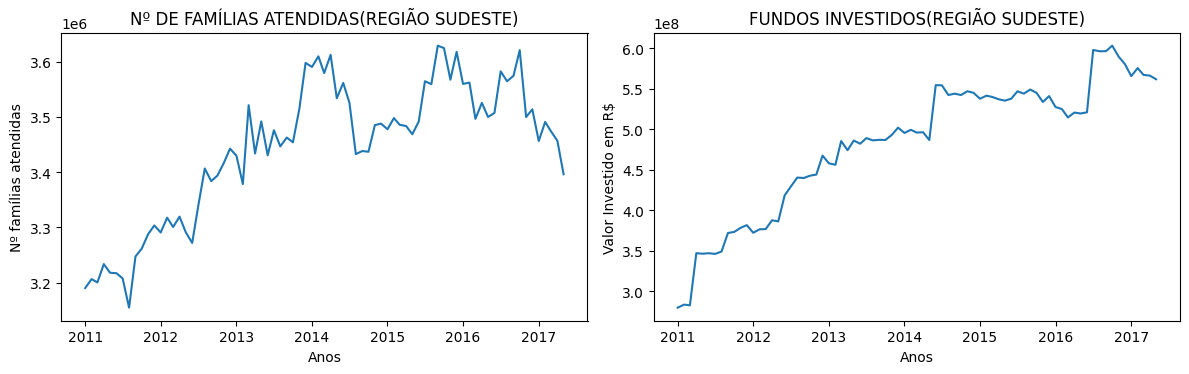

In [23]:
# Criando os valores para os eixos
x = southeast.period
y1 = southeast.families 
y2 = southeast.funding

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotar o primeiro gráfico no primeiro subplot (ax1)
ax1.plot(x, y1)
ax1.set_title('Nº DE FAMÍLIAS ATENDIDAS(REGIÃO SUDESTE)')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Nº famílias atendidas')

# Plotar o segundo gráfico no segundo subplot (ax2)
ax2.plot(x, y2)
ax2.set_title('FUNDOS INVESTIDOS(REGIÃO SUDESTE)')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor Investido em R$')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()

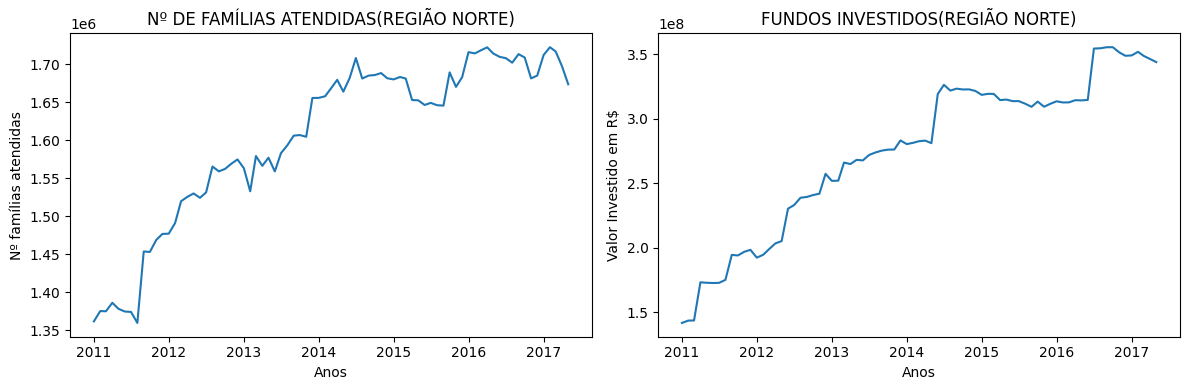

In [24]:
# Criando os valores para os eixos
x = north.period
y1 = north.families 
y2 = north.funding

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotar o primeiro gráfico no primeiro subplot (ax1)
ax1.plot(x, y1)
ax1.set_title('Nº DE FAMÍLIAS ATENDIDAS(REGIÃO NORTE)')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Nº famílias atendidas')

# Plotar o segundo gráfico no segundo subplot (ax2)
ax2.plot(x, y2)
ax2.set_title('FUNDOS INVESTIDOS(REGIÃO NORTE)')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor Investido em R$')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()

A região Norte já mostra que o número de famílias atendidas vem em uma crescente com o passar dos anos sem uma diminuição relevante em relação aos gráficos da região Nordeste e Sudeste.

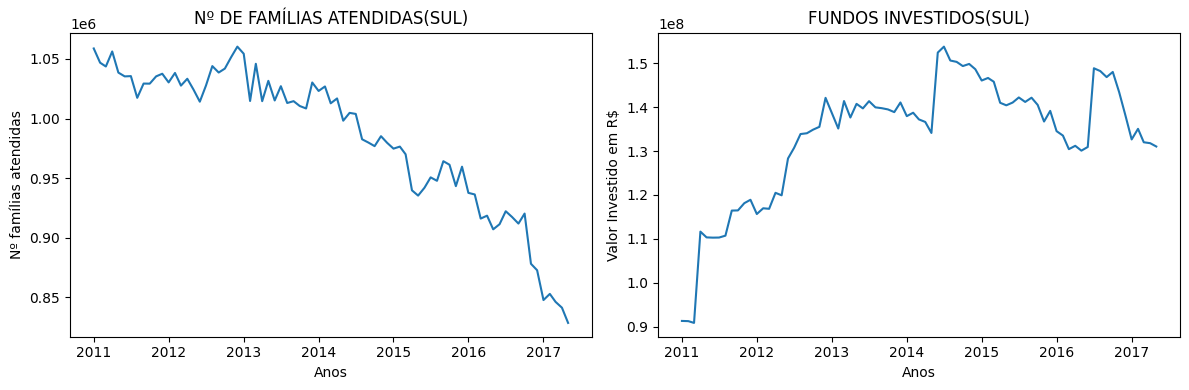

In [25]:
# Criando os valores para os eixos
x = south.period
y1 = south.families 
y2 = south.funding

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotar o primeiro gráfico no primeiro subplot (ax1)
ax1.plot(x, y1)
ax1.set_title('Nº DE FAMÍLIAS ATENDIDAS(SUL)')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Nº famílias atendidas')

# Plotar o segundo gráfico no segundo subplot (ax2)
ax2.plot(x, y2)
ax2.set_title('FUNDOS INVESTIDOS(SUL)')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor Investido em R$')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()

Na região Sul, temos um gráfico totalmente oposto em relação aos gráficos anteriores pois o número de famílias atendidas, vem caindo  em relação ao número de famílias atendidas no começo do pagamento do benefício.

In [53]:
# FILTRANDO FAMÍLIAS DA REGIÃO "sul"
familias_sul_max = df.loc[df['region'] == 'South', 'families'].max()
familias_sul_min = df.loc[df['region'] == 'South', 'families'].min()
reducao = ((familias_sul_max-familias_sul_min)*100/1060356).round(2)

# EXIBIR OS RESULTADOS DA REGIÃO "sul"
print(f'A região Sul começou em 2011 com: {familias_sul_max:,.2f} famílias atendidas e fechou 2017 com {familias_sul_min:,.2f} famílias atendidas pelo benefício.')
print(f'A região Sul de 2011 a 2017 teve uma redução de {reducao}% no número de famílias atendidas pelo benefício.')

A região Sul começou em 2011 com: 1,060,356.00 famílias atendidas e fechou 2017 com 828,406.00 famílias atendidas pelo benefício.
A região Sul de 2011 a 2017 teve uma redução de 21.87% no número de famílias atendidas pelo benefício.


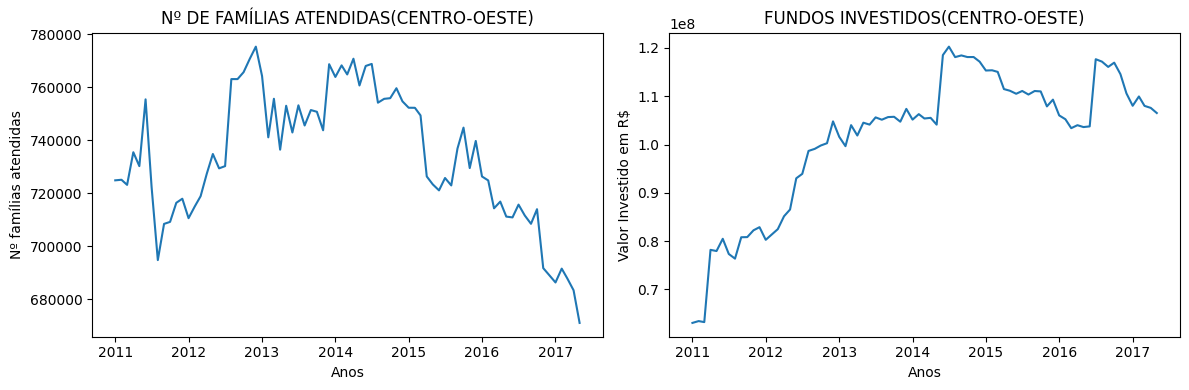

In [27]:
# Criando os valores para os eixos
x = midwest.period
y1 = midwest.families 
y2 = midwest.funding

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotar o primeiro gráfico no primeiro subplot (ax1)
ax1.plot(x, y1)
ax1.set_title('Nº DE FAMÍLIAS ATENDIDAS(CENTRO-OESTE)')
ax1.set_xlabel('Anos')
ax1.set_ylabel('Nº famílias atendidas')

# Plotar o segundo gráfico no segundo subplot (ax2)
ax2.plot(x, y2)
ax2.set_title('FUNDOS INVESTIDOS(CENTRO-OESTE)')
ax2.set_xlabel('Anos')
ax2.set_ylabel('Valor Investido em R$')

# Ajustar o espaçamento entre os subplots
plt.tight_layout()

# Exibir a figura com os dois gráficos
plt.show()


In [49]:
df

,region,families,funding,low_income_families,pct_served,period
0,Mid-West,724830,63050270,1246826,58.13,2011-01-01
1,North,1361905,141840021,2095985,64.98,2011-01-01
2,Northeast,6515825,634183529,8380881,77.75,2011-01-01
3,South,1058840,91296718,1884472,56.19,2011-01-01
4,Southeast,3189945,279860083,6486791,49.18,2011-01-01
...,...,...,...,...,...,...
380,Mid-West,671048,106525774,1246826,53.82,2017-05-01
381,North,1673708,344039342,2095985,79.85,2017-05-01
382,Northeast,6744311,1259521704,8380881,80.47,2017-05-01
383,South,828406,131026778,1884472,43.96,2017-05-01
